Bankruptcy Analysis


A company faces bankruptcy when they are unable to pay off their debts. The Taiwan Economic Journal for the years 1999 to 2009 has listed the details of company bankruptcy based on the business regulations of the Taiwan Stock Exchange. The Taiwan Stock Exchange was established in 1961 and began operating as a stock exchange on 9 February 1962. It is a financial institution located in Taipei, Taiwan. It has over 900 listed companies. The data includes a majority of numerical attributes that help understand the possibility of bankruptcy.

This notebook aims at analyzing the possibility of whether an organization would face bankruptcy. The main focus of this notebook is to predict the company will survive or not with current condition, and we position ourselves as company consultant, and we must give our client insight to keep their company running well

In [ ]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")


In [ ]:
# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


In [ ]:
data = pd.read_csv(r"C:\Users\vivih\Downloads\data.csv")
data.head()

In [ ]:
data.shape

The training data has 6819 observations and 96 features (variables) that we want to predict.

In [ ]:
data.duplicated().sum()

There is no duplicate or null values in the data frame.

In [ ]:
data.info()

As we can see, the data types of our dataset is numerical, there are integer and float type.
Next step is to check is there any missing value on this dataset?

In [ ]:
data.isnull().any()

There are no missing values which is good for the next step

In [ ]:
data['Bankrupt?'].value_counts()

In [ ]:
sns.countplot('Bankrupt?',data=data)

Looking at the plot above we can clearly see how our labels are strongly unbalanced, 
and this is a the main obstacle that we need to solve to obtain good performances.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X=data.drop(labels=['Bankrupt?'], axis=1)
y=data['Bankrupt?']

In [ ]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [ ]:
sns.countplot(x=y)

Exploratory Data Analysis (EDA).

Let's explore our dataset to gain as much information as possible from several types of visualizations. Knowing the correlations among features is an important step in deciding which features to maintain during training.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

feature_selection=SelectKBest(f_classif,k=30).fit(X,y)

In [ ]:
selected_features=X.columns[feature_selection.get_support()]

In [ ]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

In [ ]:
log_reg.score(X_test,y_test)

In [ ]:
y_pred=log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.9063131313131313

As you can see the logistic accuracy score is about 90%, which is great as model performance.
In fact, an accuracy measure of anything between 70%-90% is not only ideal, it's realistic.

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1959
           1       0.90      0.92      0.91      2001

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



<AxesSubplot:>

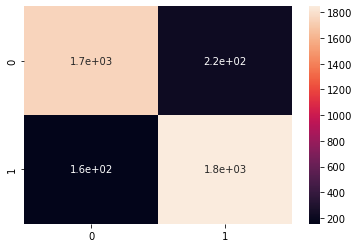

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [31]:
model.score(X_test,y_test)

0.9527777777777777

In [32]:
svc_predict=model.predict(X_test)

In [33]:
accuracy_score(y_test,svc_predict)

0.9527777777777777

In [34]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1959
           1       0.93      0.98      0.95      2001

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960



<AxesSubplot:>

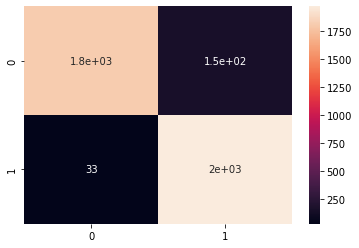

In [35]:
sns.heatmap(confusion_matrix(y_test,svc_predict,), annot=True)